<a href="https://colab.research.google.com/github/Primadya/bimbingan_karir/blob/main/BK_Hungarian_Nauval_Dwi_Primadya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1) Pengumpulan Data <a class="anchor" id="h1"></a>

menggunakan dataset yang bersumber dari UCI Machine Learning yaitu Heart Disease. Dataset yang dipakai adalah dataset dengan nama file "Hungarian.data". Data bersifat publik


## 2) Menelaah Data <a class="anchor" id="h2"></a>

In [ ]:
import pandas as pd
import re
import numpy as np
import itertools

Library yang digunakan untuk proses machine learning

### Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


memasukan lokasi dari file

In [ ]:
dir =  '/content/drive/MyDrive/heart-disease/hungarian.data'

In [ ]:
with open(dir, encoding='Latin1') as file:
  lines = [line.strip() for line in file]

lines[0:10]

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

In [ ]:
data = itertools.takewhile(
  lambda x: len(x) == 76,
  (' '.join(lines[i:(i + 10)]).split() for i in range(0, len(lines), 10))
)

df = pd.DataFrame.from_records(data)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


menampilan informasi dari file dataset yang sudah dimasukkan kedalam dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       294 non-null    object
 1   1       294 non-null    object
 2   2       294 non-null    object
 3   3       294 non-null    object
 4   4       294 non-null    object
 5   5       294 non-null    object
 6   6       294 non-null    object
 7   7       294 non-null    object
 8   8       294 non-null    object
 9   9       294 non-null    object
 10  10      294 non-null    object
 11  11      294 non-null    object
 12  12      294 non-null    object
 13  13      294 non-null    object
 14  14      294 non-null    object
 15  15      294 non-null    object
 16  16      294 non-null    object
 17  17      294 non-null    object
 18  18      294 non-null    object
 19  19      294 non-null    object
 20  20      294 non-null    object
 21  21      294 non-null    object
 22  22      294 non-null    ob

Dalam situasi dataset yang kita punya, terdapat kondisi khusus dimana sebelum melanjutkan ke tahap validasi data untuk tipe data object atau string, perlu dilakukan penghapusan fitur. Hal ini disebabkan oleh fakta bahwa dalam dataset ini, nilai null direpresentasikan dengan angka -9.0.

In [ ]:
df = df.iloc[:,:-1]
df = df.drop(df.columns[0], axis=1)

- **iloc** berfungsi untuk melakukan pemilihan berdasarkan posisi indeks.
- Penggunaan **:,:** dimaksudkan untuk memilih semua baris.
- Notasi **:-1** digunakan untuk memilih semua kolom kecuali yang terakhir.
- **df.columns[0]** dipergunakan untuk mengenali kolom pertama berdasarkan nama kolom.
- Pengaturan **axis=1** menunjukkan bahwa penghapusan dilakukan pada sumbu kolom.

In [ ]:
df = df.astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       294 non-null    float64
 7   8       294 non-null    float64
 8   9       294 non-null    float64
 9   10      294 non-null    float64
 10  11      294 non-null    float64
 11  12      294 non-null    float64
 12  13      294 non-null    float64
 13  14      294 non-null    float64
 14  15      294 non-null    float64
 15  16      294 non-null    float64
 16  17      294 non-null    float64
 17  18      294 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      294 non-null    float64
 22  23

## 3) Validasi Data <a class="anchor" id="h3"></a>

Validasi data bertujuan untuk mengetahui dan memahami isi dari dataset agar dapat dilakukan penanganan sesuai dengan kondisinya.

mengubah nilai -9.0 menjadi nilai null value sesuai dengan deskripsi dataset

In [ ]:
df.replace(-9.0, np.nan, inplace=True)

- Dengan menggunakan **df.replace()**, kita dapat mengubah nilai-nilai.

- Nilai yang ingin diubah adalah **-9.0**.

- Sebagai gantinya, kita menetapkan **np.nan** sebagai nilai pengganti.

- Pengaturan **inplace=True** digunakan agar perubahan nilai dilakukan langsung di dalam DataFrame df.

menghitung jumlah nilai null value

In [ ]:
df.isnull().sum()

1       0
2       0
3       0
4       0
5       0
     ... 
70      0
71      0
72      0
73    266
74    294
Length: 74, dtype: int64

- Penggunaan **df.isnull()** menghasilkan DataFrame boolean dengan nilai True untuk setiap sel yang berisi NaN dan False untuk setiap sel yang berisi nilai valid.

- Operasi **.sum()** digunakan untuk menjumlahkan nilai True (yang mewakili nilai NaN) dalam setiap kolom.

- Ini bermanfaat untuk membantu pemahaman terhadap data yang hilang atau tidak valid dalam setiap kolom. Setelah mengetahui jumlah nilai NaN, langkah selanjutnya dapat disesuaikan sesuai kebutuhan, seperti mengisi nilai yang hilang, menghapus baris atau kolom dengan banyak nilai NaN, atau melakukan manipulasi data lainnya untuk mengatasi kekosongan data.

In [ ]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,40.0,1.0,1.0,0.0,0.0,NaN,2.0,140.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,49.0,0.0,1.0,0.0,0.0,NaN,3.0,160.0,1.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,37.0,1.0,1.0,0.0,0.0,NaN,2.0,130.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,0.0,48.0,0.0,1.0,1.0,1.0,NaN,4.0,138.0,0.0,...,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,54.0,1.0,1.0,0.0,1.0,NaN,3.0,150.0,0.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       0 non-null      float64
 7   8       294 non-null    float64
 8   9       293 non-null    float64
 9   10      293 non-null    float64
 10  11      271 non-null    float64
 11  12      12 non-null     float64
 12  13      1 non-null      float64
 13  14      0 non-null      float64
 14  15      286 non-null    float64
 15  16      21 non-null     float64
 16  17      1 non-null      float64
 17  18      293 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      293 non-null    float64
 22  23

## 4) Menentukan Object Data <a class="anchor" id="h4"></a>

Langkah selanjutnya adalah memilih fitur-fitur yang akan digunakan dalam proses analisis. Menurut deskripsi dataset yang tertera dalam website uci-heartdisease, fitur yang digunakan adalah 14 fitur.

In [ ]:
df_selected = df.iloc[:, [1, 2, 7,8,10,14,17,30,36,38,39,42,49,56]]


In [ ]:
df_selected.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


- **df_selected** adalah DataFrame baru yang dibuat dan akan terdiri dari kolom-kolom yang telah dipilih.

- Penggunaan **df.iloc** dilakukan untuk pemilihan berdasarkan posisi indeks.

- Tanda **:** digunakan untuk memilih semua baris.

- Untuk memilih kolom-kolom yang diinginkan, kita menggunakan **[:, [1, 2, 7, 8, 10, 14, 17, 30, 36, 38, 39, 42, 49, 56]]** berdasarkan posisi indeks kolom.

In [ ]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       294 non-null    float64
 1   3       294 non-null    float64
 2   8       294 non-null    float64
 3   9       293 non-null    float64
 4   11      271 non-null    float64
 5   15      286 non-null    float64
 6   18      293 non-null    float64
 7   31      293 non-null    float64
 8   37      293 non-null    float64
 9   39      294 non-null    float64
 10  40      104 non-null    float64
 11  43      4 non-null      float64
 12  50      28 non-null     float64
 13  57      294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


Tahap berikutnya melibatkan penggantian nama kolom agar sesuai dengan 14 nama kolom yang terdapat dalam deskripsi dataset.

Informasi terkait nama dan posisi dapat ditemukan sesuai dengan keterangan yang terdapat pada situs web UCI HeartDisease.

In [ ]:
column_mapping = {
    2: 'age',
    3: 'sex',
    8: 'cp',
    9: 'trestbps',
    11: 'chol',
    15: 'fbs',
    18: 'restecg',
    31: 'thalach',
    37: 'exang',
    39: 'oldpeak',
    40: 'slope',
    43: 'ca',
    50: 'thal',
    57: 'target'
}

df_selected.rename(columns=column_mapping, inplace=True)


In [ ]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        4 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


menghitung jumlah fitur pada dataset

In [ ]:
df_selected.value_counts()

age   sex  cp   trestbps  chol   fbs  restecg  thalach  exang  oldpeak  slope  ca   thal  target
47.0  1.0  4.0  150.0     226.0  0.0  0.0      98.0     1.0    1.5      2.0    0.0  7.0   1.0       1
dtype: int64

## 5) Membersihkan Data <a class="anchor" id="h5"></a>

Proses pembersihan data dilakukan sebelum menjalankan pemodelan dengan tujuan meningkatkan akurasi model yang dihasilkan.

menghitung jumlah null values yang ada di dalam dataset

In [ ]:
df_selected.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
target        0
dtype: int64

Dari hasil keluaran kode program di atas, terdapat beberapa fitur yang hampir mencapai 90% data kosong, sehingga perlu dilakukan penghapusan fitur menggunakan fungsi drop.

In [ ]:
columns_to_drop = ['ca', 'slope','thal']
df_selected = df_selected.drop(columns_to_drop, axis=1)

In [ ]:
df_selected.isnull().sum()

age          0
sex          0
cp           0
trestbps     1
chol        23
fbs          8
restecg      1
thalach      1
exang        1
oldpeak      0
target       0
dtype: int64

Dikarenakan masih ada nilai null dibeberapa kolom fitur maka akan dilakukan pengisian nilai null menggunakan nilai mean di setiap kolomnya

In [ ]:
meanTBPS = df_selected['trestbps'].dropna()
meanChol = df_selected['chol'].dropna()
meanfbs = df_selected['fbs'].dropna()
meanRestCG = df_selected['restecg'].dropna()
meanthalach = df_selected['thalach'].dropna()
meanexang = df_selected['exang'].dropna()


In [ ]:
meanTBPS = meanTBPS.astype(float)
meanChol = meanChol.astype(float)
meanfbs = meanfbs.astype(float)
meanthalach = meanthalach.astype(float)
meanexang = meanexang.astype(float)
meanRestCG = meanRestCG.astype(float)

In [ ]:
meanTBPS = round(meanTBPS.mean())
meanChol = round(meanChol.mean())
meanfbs = round(meanfbs.mean())
meanthalach = round(meanthalach.mean())
meanexang = round(meanexang.mean())
meanRestCG = round(meanRestCG.mean())

mengubah nilai null menjadi nilai mean yang sudah ditentukan sebelumnya

In [ ]:
fill_values = {'trestbps': meanTBPS, 'chol': meanChol, 'fbs': meanfbs,
              'thalach':meanthalach,'exang':meanexang,'restecg':meanRestCG}
dfClean = df_selected.fillna(value=fill_values)

In [ ]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  target    294 non-null    float64
dtypes: float64(11)
memory usage: 25.4 KB


In [ ]:
dfClean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

melalukan pengecekan terhadap duplikasi data

In [ ]:
duplicate_rows = dfClean.duplicated()
dfClean[duplicate_rows]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


In [ ]:
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
90,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


Menghapus data yang memiliki duplikat

In [ ]:
dfClean = dfClean.drop_duplicates()
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target


In [ ]:
dfClean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


In [ ]:
dfClean['target'].value_counts()

0.0    187
1.0     37
3.0     28
2.0     26
4.0     15
Name: target, dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Mencari korelasi antar fitur

In [ ]:
dfClean.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
age,1.000000,0.014516,0.146616,0.246571,0.087101,0.181130,0.050672,-0.460514,0.239223,0.178172,0.210429
sex,0.014516,1.000000,0.245769,0.082064,0.027695,0.044372,-0.108656,-0.106959,0.154925,0.115959,0.220732
cp,0.146616,0.245769,1.000000,0.081293,0.134697,0.031930,-0.016372,-0.367819,0.494674,0.351735,0.427536
trestbps,0.246571,0.082064,0.081293,1.000000,0.080818,0.096222,0.011256,-0.181824,0.211507,0.204000,0.214898
chol,0.087101,0.027695,0.134697,0.080818,1.000000,0.107686,0.048081,-0.122038,0.161055,0.106743,0.256027
fbs,0.181130,0.044372,0.031930,0.096222,0.107686,1.000000,0.047988,-0.069722,0.115503,0.063179,0.154319
restecg,0.050672,-0.108656,-0.016372,0.011256,0.048081,0.047988,1.000000,0.006084,0.041290,0.042193,0.042643
thalach,-0.460514,-0.106959,-0.367819,-0.181824,-0.122038,-0.069722,0.006084,1.000000,-0.400508,-0.300458,-0.367525
exang,0.239223,0.154925,0.494674,0.211507,0.161055,0.115503,0.041290,-0.400508,1.000000,0.624965,0.571710
oldpeak,0.178172,0.115959,0.351735,0.204000,0.106743,0.063179,0.042193,-0.300458,0.624965,1.000000,0.580732


<Axes: >

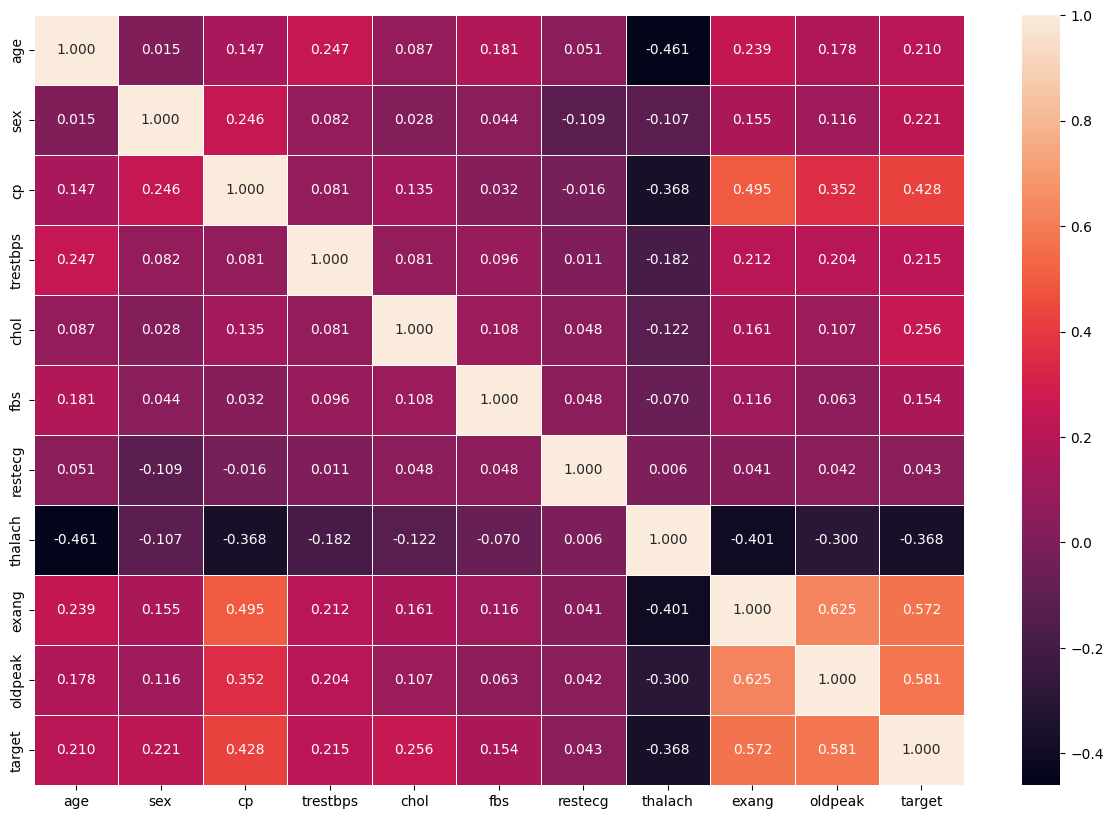

In [ ]:
cor_mat=dfClean.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f")

# 6) Konstruksi Data

Pembangunan data bertujuan untuk menyelaraskan berbagai jenis data yang terdapat dalam dataset. Akan tetapi, pada saat ini, dataset sudah memiliki jenis data yang cocok sehingga tidak diperlukan penyesuaian tambahan.

In [ ]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       293 non-null    float64
 1   sex       293 non-null    float64
 2   cp        293 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      293 non-null    float64
 5   fbs       293 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   293 non-null    float64
 10  target    293 non-null    float64
dtypes: float64(11)
memory usage: 27.5 KB


In [ ]:
dfClean.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


Setelah menyesuaikan tipe dataset, langkah selanjutnya adalah memisahkan antara fitur dan target, kemudian menyimpannya dalam variabel.

In [ ]:
X = dfClean.drop("target", axis=1).values # menghapus kolom 'target'
y = dfClean.iloc[:,-1] # mengambil kolom 'target'

cek sebaran data di setiap target

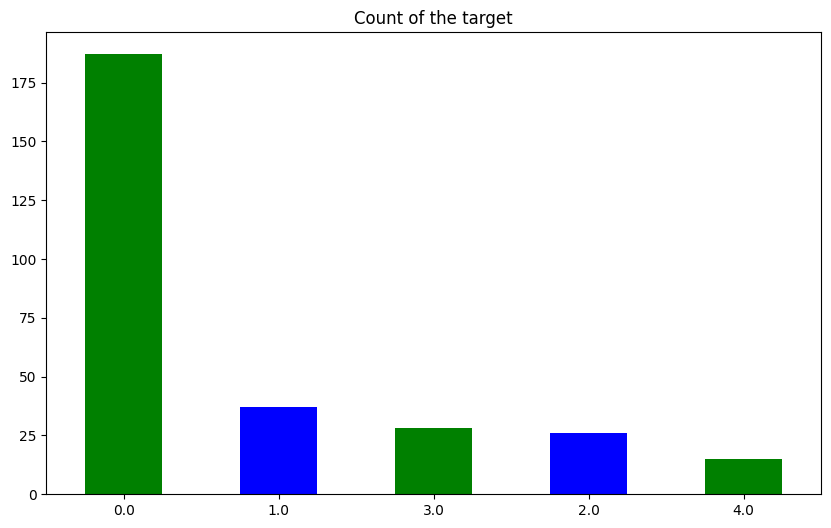

In [ ]:
# Membuat Plot Bar pada kolom Target
dfClean['target'].value_counts().plot(kind='bar', figsize=(10,6), color=['green','blue'])
plt.title("Count of the target") # menambahkan judul
plt.xticks(rotation=0); # mengatur rotasi label sumbu x menjadi 0 derajat

Grafik di atas mengindikasikan ketidakseimbangan dalam jumlah target. Untuk menanggulanginya, ada dua pendekatan: oversampling dan undersampling. Oversampling diterapkan saat dataset terbatas, sementara undersampling cocok untuk dataset yang berlimpah. Dalam penanganan ketidakseimbangan dataset kami, kami memilih teknik oversampling, khususnya metode SMOTE karena jumlah data terbatas.

In [ ]:
# Mengimpor modul SMOTE
from imblearn.over_sampling import SMOTE

In [ ]:
# Oversampling
smote = SMOTE(random_state=42)
X_smote_resampled, y_smote_resampled = smote.fit_resample(X, y)

- Dengan menggunakan **.fit_resample()**, oversampling dilakukan pada dataset fitur X dan target y. Hasilnya adalah dataset yang telah mengalami oversampling, di mana jumlah sampel dari kelas minoritas ditingkatkan untuk mencapai keseimbangan dengan kelas mayoritas.

- Variabel **X_smote_resampled** menampung fitur, sedangkan **y_smote_resampled** menampung target dari dataset yang telah mengalami oversampling.

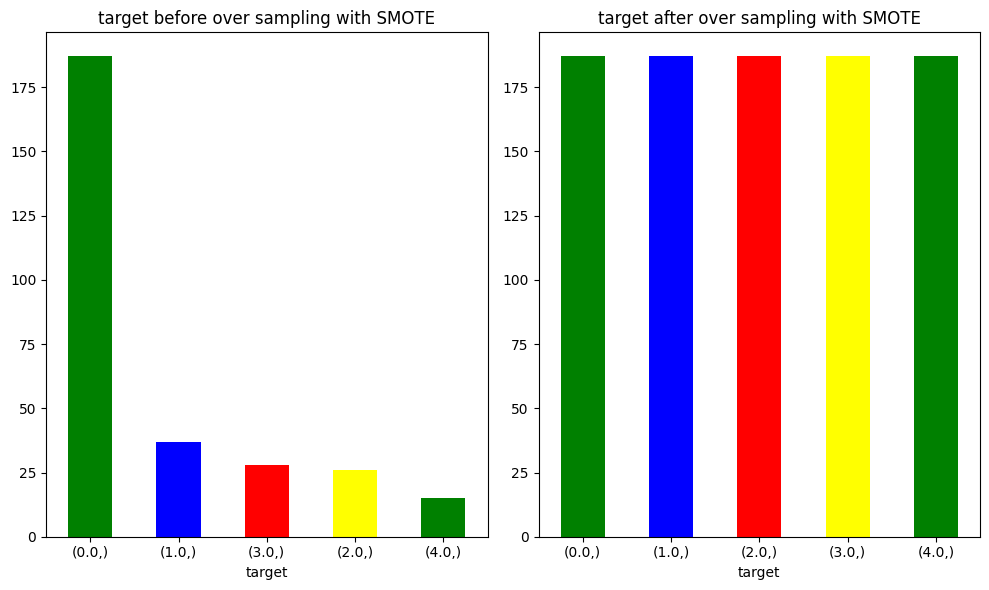

In [ ]:
# Membuat plot perbandingan jumlah kemunculan nilai target sebelum dan sesudah oversampling dengan SMOTe
plt.figure(figsize=(12,4)) # Membentuk figure dengan ukuran gambar 12x4

new_df1 = pd.DataFrame(data=y) # membentuk DataFrame yang berisi data target y

plt.subplot(1, 2, 1) # Pembentukan subplot pertama dengan tata letak 1 baris dan 2 kolom, dan memilih subplot pertama sebagai subplot saat ini
new_df1.value_counts().plot(kind='bar', figsize=(10,6), color=['green', 'blue', 'red', 'yellow'])
plt.title("target before over sampling with SMOTE") # judul untuk subplot pertama
plt.xticks(rotation=0);

plt.subplot(1, 2, 2) # pembentukan subplot kedua dengan tata letak 1 baris dan 2 kolom dan memilih subplot kedua sebagai subplot saat ini
new_df2 = pd.DataFrame(data=y_smote_resampled) # berisi data target hasil oversampling dengan SMOTe

new_df2.value_counts().plot(kind='bar', figsize=(10,6), color=['green', 'blue', 'red', 'yellow'])
plt.title("target after over sampling with SMOTE") # judul untuk subplot kedua
plt.xticks(rotation=0);

plt.tight_layout() # pengaturan tata letak plot agar lebih rapi
plt.show() # Menampilkan plot yang telah dibuat

setalah dilakukan smote, data menjadi seimbang mengikuti kelas mayoritas

In [ ]:
# Jumlah data target sebelum dilakukan SMOTe
new_df1 = pd.DataFrame(data=y)
new_df1.value_counts()

target
0.0       187
1.0        37
3.0        28
2.0        26
4.0        15
dtype: int64

In [ ]:
# over
# Jumlah data target setelah dilakukan SMOTe
new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts()

target
0.0       187
1.0       187
2.0       187
3.0       187
4.0       187
dtype: int64

melakukan normalisasi pada data

In [ ]:
dfClean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,47.822526,0.726962,2.986348,132.662116,250.860068,0.068259,0.218430,139.058020,0.303754,0.588055,0.795222
std,7.824875,0.446282,0.965049,17.576793,65.059069,0.252622,0.460868,23.558003,0.460665,0.909554,1.238251
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,248.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,4.000000


In [ ]:
# Normalisasi data fitur menggunakan Min-Max Scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_smote_resampled_normal = scaler.fit_transform(X_smote_resampled)

MinMaxScaler merupakan metode normalisasi yang digunakan untuk mengubah rentang nilai fitur menjadi rentang tertentu, umumnya dari 0 hingga 1.

- Dengan menggunakan **.fit_transform()**, perhitungan dan transformasi dilakukan pada dataset fitur untuk mengubahnya menjadi skala yang diinginkan.

- Variabel **X_smote_resampled_normal** digunakan untuk menyimpan hasil normalisasi dari proses tersebut.

In [ ]:
# Menghitung jumlah sampel dalam Dataset Fitur setelah dinormalisasi dengan Min-Max Scaler
len(X_smote_resampled_normal)

935

Menghitung panjang atau jumlah elemen dalam suatu objek, yaitu jumlah sampel dalam dataset fitur yang sudah dinormalisasi.

In [ ]:
# Membuat DataFrame dari dataset fitur yang telah dinormalisasi dan menghasilkan statistik
dfcek1 = pd.DataFrame(X_smote_resampled_normal)
dfcek1.describe()

,0,1,2,3,4,5,6,7,8,9
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,0.563739,0.842507,0.818224,0.403413,0.341027,0.094277,0.117938,0.453354,0.598398,0.227015
std,0.174873,0.332492,0.274211,0.147493,0.110990,0.252030,0.199527,0.197232,0.450288,0.201293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.473283,1.000000,0.666667,0.305556,0.267954,0.000000,0.000000,0.312720,0.000000,0.000000
50%,0.578947,1.000000,1.000000,0.387952,0.330240,0.000000,0.000000,0.440606,0.962447,0.200000
75%,0.683363,1.000000,1.000000,0.487481,0.393811,0.000000,0.201473,0.593629,1.000000,0.386166
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


membagi fitur dan target menjadi data train dan test

In [ ]:
from sklearn.model_selection import train_test_split

- Fungsi ini bertugas memecah dataset menjadi subset pelatihan (training set) dan subset pengujian (testing set) secara acak.

Artinya, subset pelatihan digunakan untuk melatih model, sedangkan subset pengujian digunakan untuk menguji kinerja model.

In [ ]:
# Membagi fitur dan target menjadi data train dan test (Untuk yang oversampling saja)
X_train, X_test, y_train, y_test = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42, stratify=y_smote_resampled)

- Parameter **test_size=0.2** digunakan untuk menentukan proporsi subset pengujian, yakni 20% dari total dataset yang telah mengalami oversampling.

- Dengan menggunakan **random_state=42**, kita mengontrol pembagian dataset secara acak agar dapat direproduksi dengan hasil yang konsisten.

- Penggunaan **stratify=y_smote_resampled** memastikan bahwa distribusi kelas pada subset pelatihan dan pengujian tetap seimbang.

In [ ]:
# Membagi fitur dan target menjadi data train dan test (untuk yang oversampling + normalization)
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42, stratify=y_smote_resampled)

# 7) Model

Setelah melakukan langkah 1 - 6, langkah selanjutnya adalah membangun model.

In [ ]:
# Fungsi yang akan dipanggil di setiap model

# Mengimpor modul yang diperlukan dari library scikit-learn
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, confusion_matrix, precision_score

# Fungsi evaluation digunakan untuk melakukan evaluasi model dengan menggunakan beberapa metrik evaluasi yang umum digunakan
def evaluation(Y_test, Y_pred):
  acc = accuracy_score(Y_test, Y_pred)
  rcl = recall_score(Y_test, Y_pred, average='weighted')
  f1 = f1_score(Y_test, Y_pred, average='weighted')
  ps = precision_score(Y_test, Y_pred, average='weighted')

  metric_dict={'accuracy': round(acc, 3),
               'recall': round(rcl, 3),
               'F1 score': round(f1, 3),
               'Precision score': round(ps, 3)
               }

  return print(metric_dict)

- Beberapa metrik evaluasi yang dihitung meliputi:
  1. **accuracy_score** -> Mengukur akurasi model.
  2. **recall_score** -> Mengukur recall (sensitivitas) model dengan opsi **average='weighted'** untuk menghitung rata-rata berdasarkan jumlah sampel dalam setiap kelas.
  3. **f1_score** -> Mengukur F1 score (rata-rata harmonik presisi dan recall).
  4. **precision_score** -> Mengukur presisi model.

- Hasil dari metrik evaluasi disimpan dalam variabel **metric_dict**.

membangun model KNN, Random Forest, dan XGBoost menggunakan SMOTE

# KNN

KNN akan dibangun dengan nilai neighbors yaitu 3.

In [ ]:
# Mengimport modul dari library scikit-learn dan XGBoost
from sklearn.neighbors import KNeighborsClassifier #Implementasi dari algoritma KNN untuk klasifikasi
from sklearn.ensemble import RandomForestClassifier #Implementasi dari algoritma RF untuk klasifikasi
from xgboost import XGBClassifier  #Implementasi dari algoritma XGBoost untuk klasifikasi
from sklearn.metrics import accuracy_score, classification_report #Untuk menghitung akurasi dan menghasilkan laporan klasifikasi

In [ ]:
# Membuat objek model KNN
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

- **knn_model** merupakan objek model.

- Parameter **n_neighbors=3** digunakan untuk menentukan jumlah tetangga terdekat yang akan digunakan dalam langkah klasifikasi.

- Dengan menggunakan metode **fit()** dari objek model **knn_model**, model dilatih menggunakan data latih (X_train) dan target latih (y_train).

In [ ]:
# Melakukan prediksi menggunakan KNN
y_pred_knn=knn_model.predict(X_test)

# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) model:")
accuracy_knn_smote=round(accuracy_score(y_test, y_pred_knn), 3)
print("Accuracy:", accuracy_knn_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors (KNN) model:
Accuracy: 0.754
Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.39      0.49        38
         1.0       0.73      0.81      0.77        37
         2.0       0.80      0.86      0.83        37
         3.0       0.77      0.87      0.81        38
         4.0       0.78      0.84      0.81        37

    accuracy                           0.75       187
   macro avg       0.75      0.76      0.74       187
weighted avg       0.74      0.75      0.74       187



- Dengan menggunakan **metode predict()**, dilakukan prediksi pada data uji (X_test) dan hasilnya disimpan dalam variabel y_pred_knn.

- Dengan menggunakan **accuracy_score()**, diukur akurasi model KNN. Hasil akurasi tersebut dibulatkan menjadi 3 desimal dan disimpan dalam variabel accuracy_knn_smote.

- Hasilnya menunjukkan bahwa akurasi saat melakukan prediksi dengan menggunakan algoritma KNN adalah 0.754.

In [ ]:
# Memanggil fungsi evaluation
evaluation(y_test, y_pred_knn)

{'accuracy': 0.754, 'recall': 0.754, 'F1 score': 0.741, 'Precision score': 0.745}


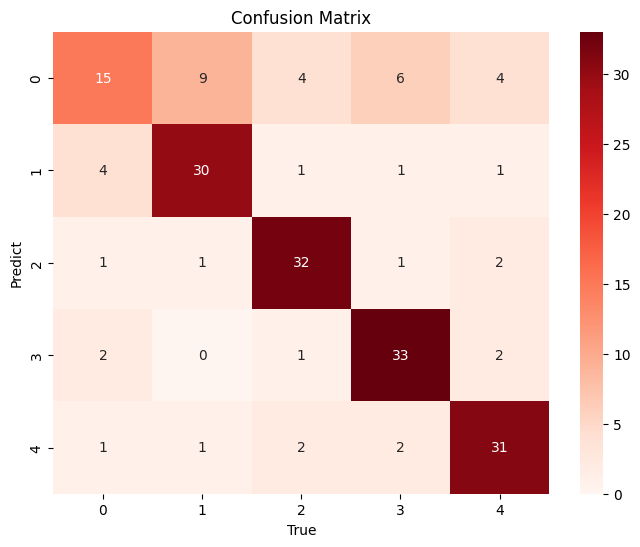

In [ ]:
# Membuat confusion matrik model KNN
cm=confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel("True")
plt.ylabel('Predict')
plt.show()

# Random Forest

Model kedua yang akan dibuat adalah Random Forest dengan jumlah estimator sebanyak 100. Ini berfungsi untuk mengontrol jumlah pohon keputusan yang akan dibangun.

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Melakukan prediksi dengan RF
y_pred_rf = rf_model.predict(X_test)

#Evaluasi Model Random Forest
print("\nRandom Forest Model: ")
accuracy_rf_smote = round(accuracy_score(y_test, y_pred_rf), 3)
print("Accuracy:", accuracy_rf_smote)
print("Classification Report: ")
print(classification_report(y_test, y_pred_rf))


Random Forest Model: 
Accuracy: 0.92
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [ ]:
evaluation(y_test, y_pred_rf)

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precision score': 0.922}


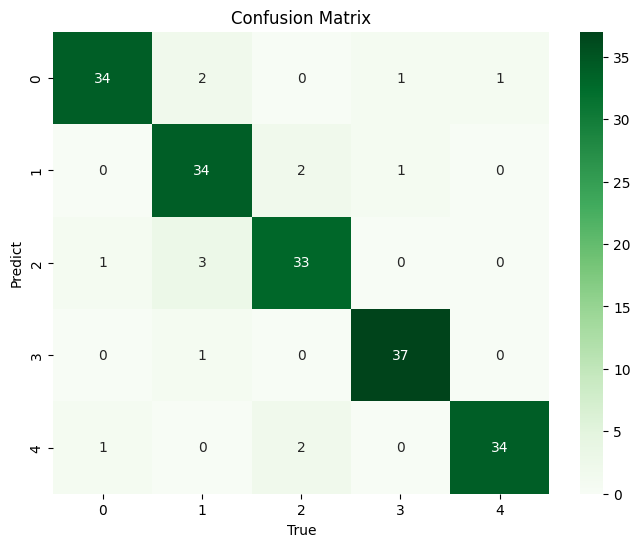

In [ ]:
# Membuat Confusion Matrix Random Forest
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Greens")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# XGBoost

Berikutnya, kita akan mengembangkan model menggunakan XGBoost, sebuah algoritma Machine Learning yang terkenal dan kuat, digunakan untuk tugas regresi dan klasifikasi. XGBoost adalah implementasi yang dioptimalkan dari algoritma Gradient Boosting, mengadopsi ensemble learning dengan pohon keputusan sebagai model dasarnya. Learning rate yang akan digunakan adalah 0.1, dan jumlah estimator (n_estimators) diatur sebanyak 100.

In [ ]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# melakukan prediksi dengan XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# Evaluasi Model XGBoost
print("\nXGBoost Model: ")
accuracy_xgb_smote = round(accuracy_score(y_test, y_pred_xgb), 3)
print("Accuracy: ", accuracy_xgb_smote)
print("Classification Report: ")
print(classification_report(y_test, y_pred_xgb))


XGBoost Model: 
Accuracy:  0.904
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.89      0.87        37
         3.0       0.88      0.97      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



In [ ]:
evaluation(y_test, y_pred_xgb)

{'accuracy': 0.904, 'recall': 0.904, 'F1 score': 0.904, 'Precision score': 0.906}


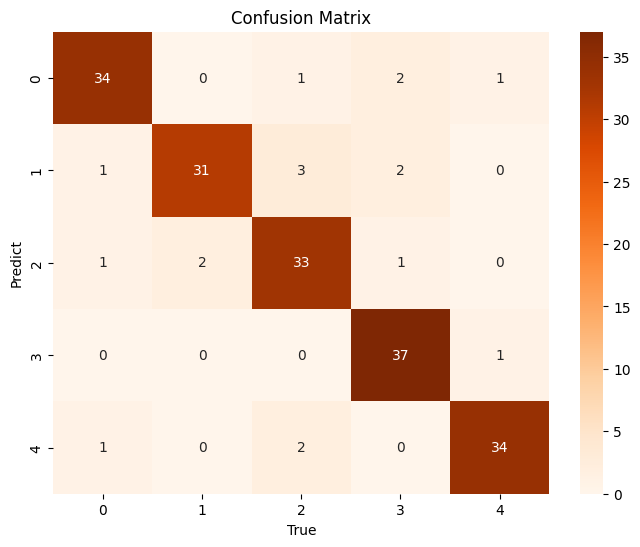

In [ ]:
# membuat confusion matriks XGBoost
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.title('Confusion Matrix')
plt.xlabel("True")
plt.ylabel('Predict')
plt.show()

# Oversample + Normalisasi

Setelah membangun model KNN, Random Forest, dan XGBoost menggunakan data yang telah mengalami oversampling, langkah berikutnya adalah membangun model KNN, Random Forest, dan XGBoost dengan data yang telah mengalami oversampling dan normalisasi.

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_normal, y_train_normal)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_knn = knn_model.predict(X_test_normal)

# Evaluasi Model KNN
print("K-Nearest Neighbors (KNN) Model: ")
accuracy_knn_smote_normal = round(accuracy_score(y_test_normal, y_pred_knn), 3)
print("Accuracy: ", accuracy_knn_smote_normal)
print("Classification Report: ")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model: 
Accuracy:  0.754
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.65      0.39      0.49        38
         1.0       0.73      0.81      0.77        37
         2.0       0.80      0.86      0.83        37
         3.0       0.77      0.87      0.81        38
         4.0       0.78      0.84      0.81        37

    accuracy                           0.75       187
   macro avg       0.75      0.76      0.74       187
weighted avg       0.74      0.75      0.74       187



Dibagian sini tidak terjadi perubahan:(

In [ ]:
evaluation(y_test_normal, y_pred_knn)

{'accuracy': 0.754, 'recall': 0.754, 'F1 score': 0.741, 'Precision score': 0.745}


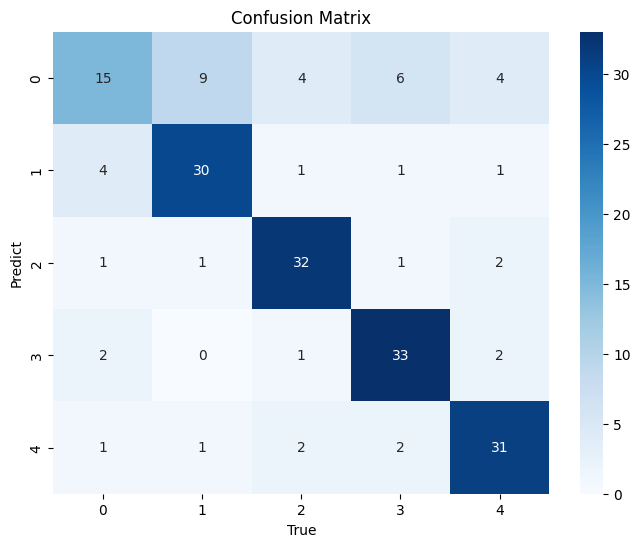

In [ ]:
cm = confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel("True")
plt.ylabel('Predict')
plt.show()

# Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_normal, y_train_normal)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test_normal)

#Evaluasi Model Random Forest
print("\nRandom Forest Model: ")
accuracy_rf_smote_normal = round(accuracy_score(y_test_normal, y_pred_rf), 3)
print("Accuracy: ", accuracy_rf_smote_normal)
print("Classification Report: ")
print(classification_report(y_test_normal, y_pred_rf))


Random Forest Model: 
Accuracy:  0.92
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [ ]:
evaluation(y_test_normal, y_pred_rf)

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precision score': 0.922}


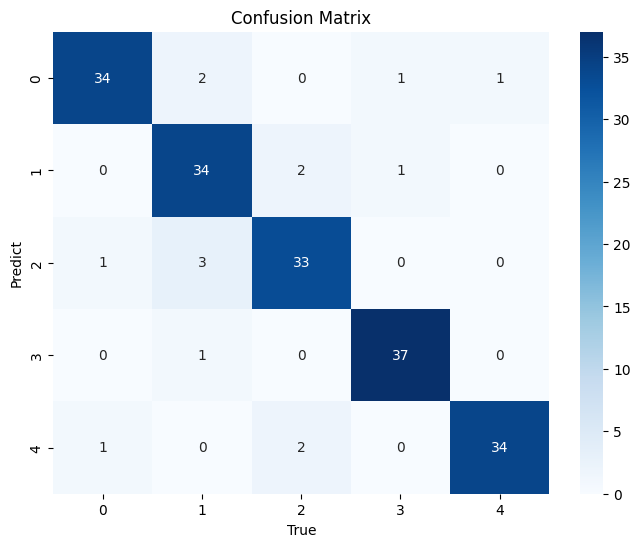

In [ ]:
cm = confusion_matrix(y_test_normal, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# XGBoost

In [ ]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train_normal, y_train_normal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test_normal)

#Evaluasi Model XGBoost
print("\nXGBoost Model: ")
accuracy_xgb_smote_normal = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy: ", accuracy_xgb_smote_normal)
print("Classification Report: ")
print(classification_report(y_test_normal, y_pred_xgb))


XGBoost Model: 
Accuracy:  0.904
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.89      0.87        37
         3.0       0.88      0.97      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



In [ ]:
evaluation(y_test_normal, y_pred_xgb)

{'accuracy': 0.904, 'recall': 0.904, 'F1 score': 0.904, 'Precision score': 0.906}


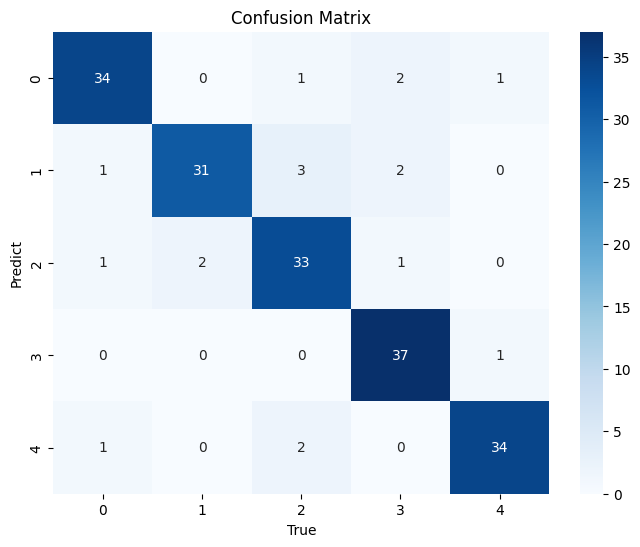

In [ ]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel("True")
plt.ylabel('Predict')
plt.show()

# Tunning + Normalization + Oversample

Berikutnya, akan dibuat model KNN, Random Forest, dan XGBoost dengan menggunakan data yang telah di-oversample, dinormalisasi, dan disesuaikan. Tuning, atau penyesuaian, adalah langkah mengoptimalkan parameter atau hiperparameter dalam model machine learning untuk mencapai performa yang lebih baik. Tujuan dari tuning adalah meningkatkan kualitas model dengan mengatur parameter-parameter yang memengaruhi kinerja model.

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV

Untuk proses tuning pada KNN menggunakan **RandomizedSearchCV**

In [ ]:
# Membuat objek model KNN
knn_model = KNeighborsClassifier()

# Menentukan ruang parameter
param_grid={
    "n_neighbors": range(3, 21),
    "metric": ["euclidean", "manhattan", "chebyshev"],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree"],
    "leaf_size": range(10, 61),
}

# Membuat objek RandomizedSearchCV
knn_model = RandomizedSearchCV(estimator = knn_model, param_distributions=param_grid, n_iter=100, scoring="accuracy", cv=5)

# Melakukan tuning
knn_model.fit(X_train_normal, y_train_normal)

# Mendapatkan parameter terbaik
best_params = knn_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'weights': 'distance', 'n_neighbors': 6, 'metric': 'manhattan', 'leaf_size': 52, 'algorithm': 'ball_tree'}


- **n_neighbors** -> jumlah tetangga
- **metric** -> metrik jarak
- **leaf_size** -> ukuran leaf dalam pohon
- **n_iter** -> jumlah iterasi pencarian acak
- **scoring** -> metrik evaluasi untuk memilih model terbaik
- **cv** -> jumlah lipatan dalam validasi silang

Dari hasil tersebut, ditemukan parameter optimal sebagai berikut:
1. Bobot -> distance
2. Jumlah tetangga -> 6
3. Metrik jarak -> manhattan
4. Ukuran leaf -> 28
5. Algoritma -> ball_tree

In [ ]:
y_pred_knn = knn_model.predict(X_test_normal)

#Evaluasi Model KNN
print("K-Nearest Neighbors (KNN) Model: ")
accuracy_knn_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_knn),3)
print("Accuracy: ", accuracy_knn_smote_normal_Tun)
print("Classification Report: ")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model: 
Accuracy:  0.781
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.88      0.39      0.55        38
         1.0       0.74      0.84      0.78        37
         2.0       0.82      0.84      0.83        37
         3.0       0.71      0.92      0.80        38
         4.0       0.83      0.92      0.87        37

    accuracy                           0.78       187
   macro avg       0.80      0.78      0.77       187
weighted avg       0.80      0.78      0.77       187



In [ ]:
evaluation(y_test_normal, y_pred_knn)

{'accuracy': 0.781, 'recall': 0.781, 'F1 score': 0.766, 'Precision score': 0.796}


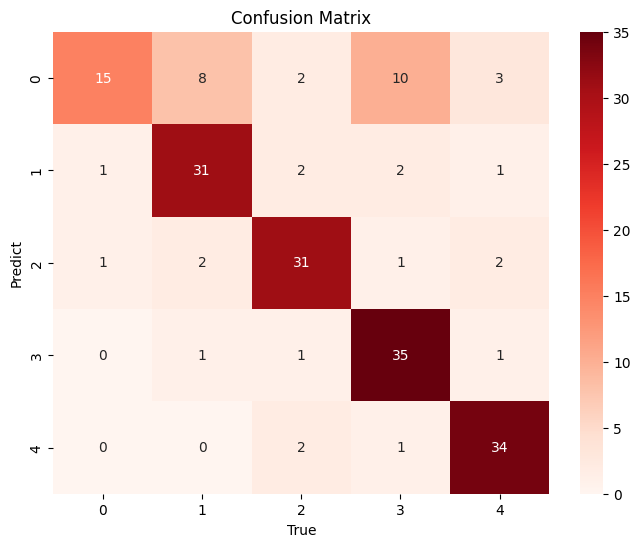

In [ ]:
cm=confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.title('Confusion Matrix')
plt.xlabel("True")
plt.ylabel('Predict')
plt.show()

# Random Forest

In [ ]:
# Membuat objek model Random Forest
rf_model = RandomForestClassifier()

# Menentukan ruang parameter
param_grid = {
    "n_estimators": [100, 200], # Jumlah estimators
    "max_depth": [ 10, 15], # Kedalaman maksimum pohon
    "min_samples_leaf": [1, 2], # Jumlah minimum sampel pada daun
    "min_samples_split": [2, 5], # Jumlah minimum sampel untuk membagi simpul internal
    "max_features": ["sqrt", "log2"], # jumlah fitur maksimum yang dipertimbangkan saat mencari pemisahan terbaik
    # "random_state": [42, 100, 200]
}

# Membuat objek RandomizedSearchCV
rf_model = RandomizedSearchCV(rf_model, param_grid, n_iter=100, cv=5, n_jobs=-1)

# Melakukan tuning
rf_model.fit(X_train_normal, y_train_normal)

# Mendapatkan parameter terbaik
best_params = rf_model.best_params_
print(f"Best parameters: {best_params}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}


Dari hasil di atas didapatkan parameter terbaik, yaitu:
1. n_estimators -> 100
2. min_samples_split -> 2
3. min_samples_leaf -> 2
4. max_features -> sqrt
5. max_depth -> 15

In [ ]:
y_pred_rf = rf_model.predict(X_test_normal)

# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))


Random Forest Model:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93        38
         1.0       0.89      0.89      0.89        37
         2.0       0.87      0.89      0.88        37
         3.0       0.93      0.97      0.95        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [ ]:
evaluation(y_test_normal,y_pred_rf)


{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precision score': 0.921}


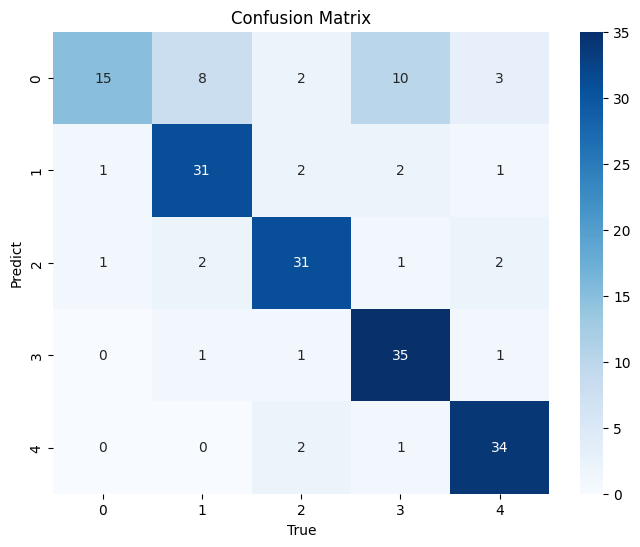

In [ ]:
cm = confusion_matrix(y_test_normal, y_pred_knn)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# XGBoost

In [ ]:
# Membuat objek model XGBoost
xgb_model = XGBClassifier()

# Menentukan ruang parameter
param_grid = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1], # tingkat pembelajaran
    "n_estimators": [100, 200],
    "gamma": [0, 0.1], # faktor pengurangan pemisahan simpul
    "colsample_bytree": [0.7, 0.8], # fraksi fitur yang dipertimbangkan pemisahan sampul
}

# Membuat objek RandomizedSearchCV
xgb_model = RandomizedSearchCV(xgb_model, param_grid, n_iter=10, cv=5, n_jobs=-1)

#Melakukan Tuning
xgb_model.fit(X_train_normal, y_train_normal)

# Mendapatkan parameter terbaik
best_params = xgb_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}


Dari hasil diatas didapatkan parameter terbaik, yaitu:
1. n_estimators -> 100
2. max_depth -> 5
3. learning_rate -> 0.1
4. gamma -> 0.1
5. colsample_bytree -> 0.8

In [ ]:
y_pred_xgb = xgb_model.predict(X_test_normal)

# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))


XGBoost Model:
Accuracy: 0.914
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90        38
         1.0       0.91      0.84      0.87        37
         2.0       0.89      0.89      0.89        37
         3.0       0.93      1.00      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.91       187
   macro avg       0.92      0.91      0.91       187
weighted avg       0.92      0.91      0.91       187



In [ ]:
evaluation(y_test_normal,y_pred_xgb)


{'accuracy': 0.914, 'recall': 0.914, 'F1 score': 0.914, 'Precision score': 0.915}


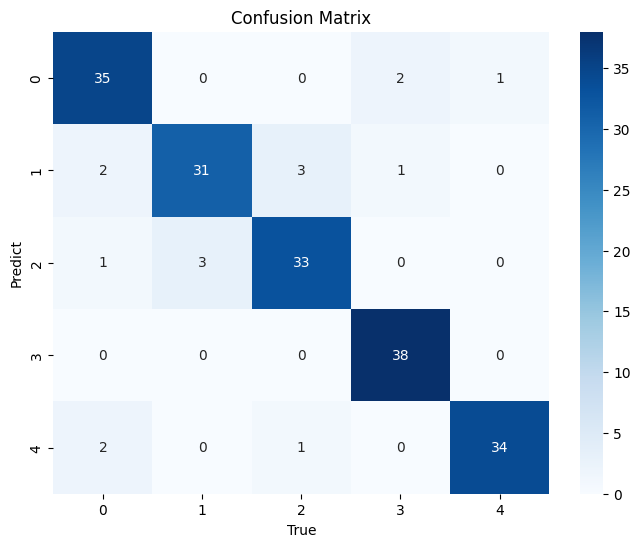

In [ ]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# 8) Evaluasi

Setelah melalui fase pembangunan model, langkah berikutnya adalah evaluasi. Pada tahap ini, evaluasi data dilakukan untuk membandingkan kinerja antar algoritma dengan tujuan menentukan jenis model algoritma yang memberikan akurasi terbaik.

In [ ]:
import matplotlib.pyplot as plt

Menampilkan hasil evaluasi dari data yang dilakukan SMOTE

In [ ]:
# Membuat DataFrame
model_compl = pd.DataFrame({'Model': ['K-Nearest Neighbour', 'Random Forest', 'XGBoost'], 'Accuracy':[accuracy_knn_smote*100, accuracy_rf_smote*100, accuracy_xgb_smote*100]})
model_compl.head()

,Model,Accuracy
0,K-Nearest Neighbour,75.4
1,Random Forest,92.0
2,XGBoost,90.4


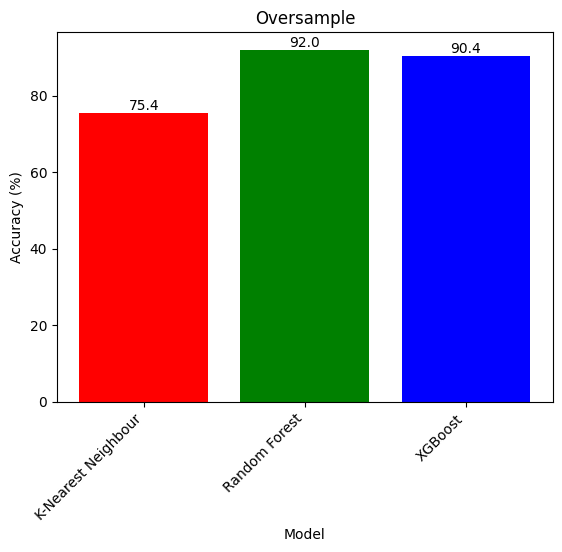

In [ ]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_compl['Model'], model_compl['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

#Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x()+bar.get_width()/2, yval, round(yval,2), ha='center', va='bottom')

plt.show()

Dari diagram batang tersebut, terlihat bahwa penggunaan SMOTE pada algoritma Random Forest menghasilkan akurasi terbaik, mencapai 92.0%.

Menampilkan evaluasi hasil dari data yang telah mengalami Oversampling (SMOTE) dan Normalisasi.

In [ ]:
model_comp2 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest',
                    'XGBoost'], 'Accuracy': [accuracy_knn_smote_normal*100,
                    accuracy_rf_smote_normal*100,accuracy_xgb_smote_normal*100]})
model_comp2.head()

,Model,Accuracy
0,K-Nearest Neighbour,75.4
1,Random Forest,92.0
2,XGBoost,90.4


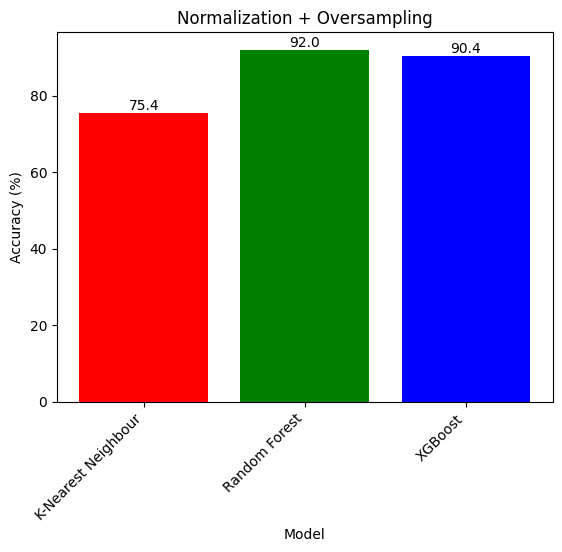

In [ ]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp2['Model'], model_comp2['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling')
plt.xticks(rotation=45, ha='right')  # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

Dari bar plot tersebut, dapat disimpulkan bahwa penggunaan SMOTE dan Normalisasi pada Random Forest menghasilkan akurasi terbaik, mencapai 92.0%.

Menampilkan evaluasi hasil dari data yang telah mengalami Tuning dengan Oversampling (SMOTE) dan Normalisasi.

In [ ]:
model_comp3 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest',
                    'XGBoost'], 'Accuracy': [accuracy_knn_smote_normal_Tun*100,
                    accuracy_rf_smote_normal_Tun*100,accuracy_xgb_smote_normal_Tun*100]})
model_comp3.head()

,Model,Accuracy
0,K-Nearest Neighbour,78.1
1,Random Forest,92.0
2,XGBoost,91.4


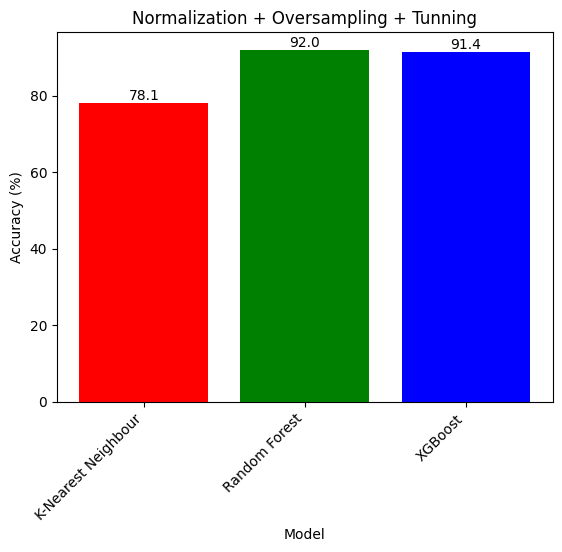

In [ ]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp3['Model'], model_comp3['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling + Tunning')
plt.xticks(rotation=45, ha='right')  # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

Dari diagram batang tersebut, disimpulkan bahwa algoritma Random Forest memperoleh keunggulan dengan akurasi sebesar 89.3% saat menggunakan data yang telah melalui proses Tuning, Oversampling, dan Normalisasi.

Selanjutnya, model terbaik akan dikompilasi.

In [ ]:
# Data frame
model_compBest = pd.DataFrame({
    'Model': ['Random Forest OverSample Standarization', 'Random Forest OverSample',
              'Random Forest OverSample Standarization Tunning'],
    'Accuracy': [accuracy_rf_smote_normal*100, accuracy_rf_smote*100,
                 accuracy_rf_smote_normal_Tun*100]
})

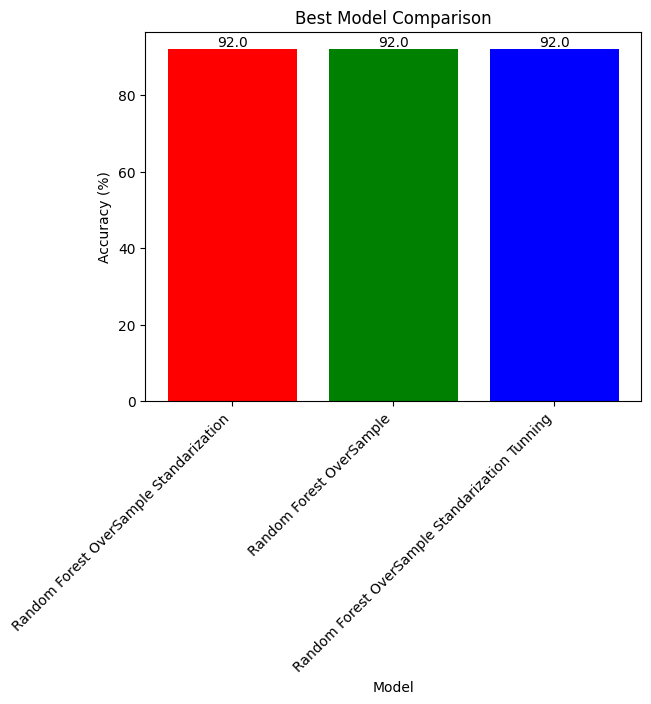

In [ ]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_compBest['Model'], model_compBest['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Best Model Comparison')
plt.xticks(rotation=45, ha='right')  # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

# 9) Kesimpulan

Dari penelitian tersebut, setelah memodelkan menggunakan algoritma KNN, Random Forest, dan XGBoost dengan beberapa penanganan data seperti random oversampling SMOTE untuk mengatasi ketidakseimbangan data, RandomSearchCV untuk tuning, dan normalisasi data menggunakan MinMaxScaler, dapat disimpulkan bahwa klasifikasi menggunakan Random Oversampling SMOTE pada model KNN menghasilkan akurasi 75.4%, model Random Forest mencapai akurasi 92%, dan model XGBoost menghasilkan akurasi 90.4%.

Selanjutnya, klasifikasi menggunakan data yang sudah dinormalisasi dan diberikan SMOTE pada model KNN memberikan akurasi 75.4%, model Random Forest tetap pada akurasi 92%, dan model XGBoost mendapatkan akurasi 90.4%. Tidak terlihat perubahan antara penggunaan SMOTE saja dengan penggunaan normalisasi dan SMOTE.

Terakhir, klasifikasi menggunakan data yang telah dituning, dinormalisasi, dan diberikan SMOTE pada model KNN memberikan akurasi 78.1%, model Random Forest mencapai akurasi 89.3%, dan model XGBoost dengan akurasi 88.2%.

Dengan demikian, dapat disimpulkan bahwa penanganan data yang optimal untuk masalah ketidakseimbangan data melibatkan metode SMOTE bersamaan dengan tuning dan normalisasi data. Pendekatan ini dapat memberikan hasil yang signifikan dalam meningkatkan akurasi model klasifikasi, terutama pada model KNN dan XGBoost. Namun, penanganan tersebut tidak menghasilkan peningkatan akurasi pada model Random Forest.

# 10) Streamlit

In [ ]:
# Save model as pickle
import pickle

# Simpan model ke dalam file pickle
# Random Forest
# with open('model_rf.pickle', 'wb') as f:
#    pickle.dump(rf_model, f)

# XGB
with open('model_xgb1.pickle', 'wb') as f:
    pickle.dump(xgb_model, f)

# Simpan akurasi XGBoost dalam pickle
model_info = {'df4MinMax':dfClean, 'accuracy':accuracy_xgb_smote_normal_Tun*100}
with open('model_info.pickle', 'wb') as f:
    pickle.dump(model_info, f)

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2
